In [35]:
!pip install wandb

     |████████████████████████████████| 1.6 MB 7.7 MB/s 
     |████████████████████████████████| 97 kB 7.2 MB/s 
     |████████████████████████████████| 133 kB 59.7 MB/s 
     |████████████████████████████████| 170 kB 60.6 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-py3-none-any.whl size=6502 sha256=0597396408b013ab4398ad06a95d1ca0b300292131eab673a9a2f2433dce0ed3
  Stored in directory: /root/.cache/pip/wheels/50/ca/fa/8fca8d246e64f19488d07567547ddec8eb084e8c0d7a59226a
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=0b8bdb9b3d53704e521b98ae99ca93a5ad453418ed164c456f5d8ba5930c00d7
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built subprocess32 pathtools


In [38]:
import wandb
# from wandb.keras import callback

In [39]:
wandb.login()
wandb.init('RNN model')

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: ruoro (use `wandb login --relogin` to force relogin)


In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#for word embedding
import gensim
from gensim.models import Word2Vec
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.util import ngrams
from spacy.lang.en import English
nlp = English()
import spacy
from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df = pd.read_csv('/content/MentalHealth_orig (1).csv')
df.head(1)

,Unnamed: 0,tweet,location,disorder,hour,clean_tweet
0,0,shock as a young man climbs on top of a hospit...,"nairobi, kenya",4,10,"['shock', 'young', 'man', 'climbs', 'top', 'ho..."


In [4]:
df.drop(['Unnamed: 0','tweet','location', 'hour'],axis=1,inplace=True)

In [5]:
#removing url links
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

df['clean_tweet']=df['clean_tweet'].apply(lambda x : remove_URL(x))

In [6]:
df.head(1)

,disorder,clean_tweet
0,4,"['shock', 'young', 'man', 'climbs', 'top', 'ho..."


In [7]:
df.to_csv('clean.csv')

In [ ]:
!pip install keras
!pip install tensorflow

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing import sequence
from __future__ import absolute_import,division,print_function,unicode_literals
import nltk
from nltk.corpus import stopwords

from numpy import array

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers.core import Activation, Dropout, Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import GlobalMaxPooling1D

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
import tensorflow_hub as hub

In [11]:
#Split between the test and train data
X_train,X_test = train_test_split(df, test_size = 0.2, random_state = 1000)
X_train.shape,X_test.shape

((604, 2), (152, 2))

In [12]:
#Dealing with class imbalance using weights
from sklearn.utils import class_weight
class_weights = list(class_weight.compute_class_weight('balanced', np.unique(df['disorder']),df['disorder']))
class_weights

[0.33992805755395683,
 6.75,
 5.5588235294117645,
 7.875,
 0.26770538243626063,
 10.5,
 6.75,
 1.6016949152542372]

In [13]:
clean = pd.read_csv('/content/clean.csv')
clean.head(1)

,Unnamed: 0,disorder,clean_tweet
0,0,4,"['shock', 'young', 'man', 'climbs', 'top', 'ho..."


In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
cv = CountVectorizer(stop_words='english')
rt = cv.fit_transform(clean['clean_tweet'])
clean.drop('clean_tweet',axis=1,inplace=True)
rt = pd.DataFrame(rt.toarray())
df = pd.concat([clean,rt],axis=1)
df.head(1)

,Unnamed: 0,disorder,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,3261,3262,3263,3264,3265,3266,3267,3268,3269,3270,3271,3272,3273,3274,3275,3276,3277,3278,3279,3280,3281,3282,3283,3284,3285,3286,3287,3288,3289,3290,3291,3292,3293,3294,3295,3296,3297,3298,3299,3300
0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
df.columns

Index(['Unnamed: 0',   'disorder',            0,            1,            2,
                  3,            4,            5,            6,            7,
       ...
               3291,         3292,         3293,         3294,         3295,
               3296,         3297,         3298,         3299,         3300],
      dtype='object', length=3303)

In [17]:
df.drop("Unnamed: 0",axis=1,inplace=True)
df.head(1)

,disorder,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,3261,3262,3263,3264,3265,3266,3267,3268,3269,3270,3271,3272,3273,3274,3275,3276,3277,3278,3279,3280,3281,3282,3283,3284,3285,3286,3287,3288,3289,3290,3291,3292,3293,3294,3295,3296,3297,3298,3299,3300
0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
X = df.drop('disorder',axis=1)
y = df['disorder']

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=101)
X_eval, X_test, y_eval, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=101)

In [45]:
#Turn the weights into a dictionary
weights={}
for index, weight in enumerate(class_weights):
  weights[index]=weight

In [21]:
#Set the data as a tensor


In [46]:
#Create an embedding layer using a pretrained model
embedding='https://tfhub.dev/google/tf2-preview/nnlm-en-dim128/1'
hub_layer=hub.KerasLayer(embedding,output_shape=[128],input_shape=[],
                        dtype=tf.string,trainable=True)

In [57]:

#Build a keras sequential model
input_dim = len(df.columns) - 1
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(4, input_dim = input_dim , activation = 'relu'))
model.add(tf.keras.layers.Dense(4, activation = 'relu'))
model.add(tf.keras.layers.Dense(4, activation = 'relu'))
model.add(tf.keras.layers.Dense(4, activation = 'relu'))
model.add(tf.keras.layers.Dense(8, activation = 'softmax'))

In [69]:

# Initialize wandb with your project name
run = wandb.init(project='RNN_model_Twitter_mentalHealth',
                 config={  # and include hyperparameters and metadata
                     "learning_rate": 0.005,
                     "epochs": 10,
                     "batch_size": 16,
                     "loss_function": "sparse_categorical_crossentropy",
                     "architecture": "&NN",
                     "dataset": "TweetClassification"
                 })
config = wandb.config  # We'll use this to configure our experiment

# Initialize model like you usually do.
tf.keras.backend.clear_session()
model.summary()

# Compile model like you usually do.
# Notice that we use config, so our metadata matches what gets executed
optimizer = tf.keras.optimizers.Adam(config.learning_rate) 
model.compile(optimizer, config.loss_function, metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 13208     
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 40        
Total params: 13,308
Trainable params: 13,308
Non-trainable params: 0
_________________________________________________________________


In [70]:
#Model training
from wandb.keras import WandbCallback
history=model.fit(X_train,
                  y_train,
                  validation_data = (X_val, y_val),
                  epochs = 10,batch_size=16,
                  callbacks=[WandbCallback()])

Epoch 1/10
38/38 [==============================] - 1s 10ms/step - loss: 1.2956 - accuracy: 0.4636 - val_loss: 1.2167 - val_accuracy: 0.4803
Epoch 2/10
38/38 [==============================] - 0s 3ms/step - loss: 1.2947 - accuracy: 0.4636 - val_loss: 1.2152 - val_accuracy: 0.4803
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 1.2946 - accuracy: 0.4636 - val_loss: 1.2139 - val_accuracy: 0.4803
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 1.2938 - accuracy: 0.4636 - val_loss: 1.2124 - val_accuracy: 0.4803
Epoch 5/10
38/38 [==============================] - 0s 4ms/step - loss: 1.2936 - accuracy: 0.4636 - val_loss: 1.2120 - val_accuracy: 0.4803
Epoch 6/10
38/38 [==============================] - 0s 3ms/step - loss: 1.2933 - accuracy: 0.4636 - val_loss: 1.2106 - val_accuracy: 0.4803
Epoch 7/10
38/38 [==============================] - 0s 3ms/step - loss: 1.2930 - accuracy: 0.4636 - val_loss: 1.2104 - val_accuracy: 0.4803
Epoch 8/10
38/38 [=

In [71]:
X_train.shape

(604, 3301)

In [72]:
import matplotlib.pyplot as plt


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


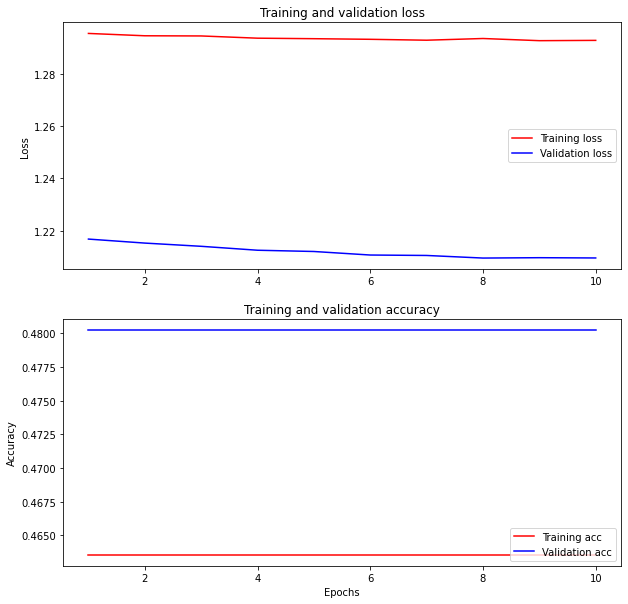

In [73]:
#plot of model perfomance

history_dict = history.history
print(history_dict.keys())
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 10))
fig.tight_layout()

plt.subplot(2, 1, 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [74]:
#Build a keras sequential model
input_dim = len(df.columns) - 1
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(8, input_dim = input_dim , activation = 'relu'))
model.add(tf.keras.layers.Dense(8, activation = 'relu'))
model.add(tf.keras.layers.Dense(8, activation = 'relu'))
model.add(tf.keras.layers.Dense(8, activation = 'relu'))
model.add(tf.keras.layers.Dense(8, activation = 'softmax'))

In [75]:
# We compile using adam optimizer
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [85]:
#Model training

history=model.fit(X_train,y_train,
                  validation_data = (X_val, y_val),
                  epochs = 10,batch_size=5, 
                  callbacks=[WandbCallback()])
run.finish()

Epoch 1/10
121/121 [==============================] - 0s 4ms/step - loss: 0.3521 - accuracy: 0.8609 - val_loss: 0.8071 - val_accuracy: 0.7368
Epoch 2/10
121/121 [==============================] - 0s 2ms/step - loss: 0.3325 - accuracy: 0.8526 - val_loss: 0.8060 - val_accuracy: 0.7434
Epoch 3/10
121/121 [==============================] - 0s 2ms/step - loss: 0.3180 - accuracy: 0.8659 - val_loss: 0.7955 - val_accuracy: 0.7566
Epoch 4/10
121/121 [==============================] - 0s 3ms/step - loss: 0.2960 - accuracy: 0.8576 - val_loss: 0.7882 - val_accuracy: 0.7697
Epoch 5/10
121/121 [==============================] - 0s 2ms/step - loss: 0.2787 - accuracy: 0.8825 - val_loss: 0.8091 - val_accuracy: 0.7697
Epoch 6/10
121/121 [==============================] - 0s 2ms/step - loss: 0.2784 - accuracy: 0.8642 - val_loss: 0.8048 - val_accuracy: 0.7697
Epoch 7/10
121/121 [==============================] - 0s 2ms/step - loss: 0.2677 - accuracy: 0.8675 - val_loss: 0.8332 - val_accuracy: 0.7632
Epoch 

epoch,9
loss,0.24591
accuracy,0.88907
val_loss,0.85849
val_accuracy,0.76316
_runtime,802
_timestamp,1629320285
_step,29
best_val_loss,0.76019
best_epoch,3


epoch,▁▂▃▃▄▅▆▆▇█▁▂▃▃▄▅▆▆▇█▁▂▃▃▄▅▆▆▇█
loss,▆▆▆▆▆▆▆▆▆▆█▅▄▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁
accuracy,▂▂▂▂▂▂▂▂▂▂▁▃▅▆▇▆▇▇▇▇██████████
val_loss,██████████▇▅▂▁▁▂▁▂▂▁▂▂▂▁▂▂▂▂▃▃
val_accuracy,▂▂▂▂▂▂▂▂▂▂▁▂▆▆▆▆▇▇▇▇▇▇▇███▇▇█▇
_runtime,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁██████████
_timestamp,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁██████████
_step,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███


In [77]:
y_pred =model.predict(X_test)


In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score


In [87]:
# model.metrics.r2_score(y_val, y_pred)

AttributeError: ignored

In [ ]:
# y_pred.dtype, y_eval.shape, y_test.shape, y_val.shape
y_pred

In [ ]:
# y_test.dtype

In [ ]:
# y_pred = y_pred.astype('int64')

In [ ]:
# y_pred.dtype

In [ ]:
import pandas as pd


In [ ]:
# y_pred.dtype

In [ ]:
# y_train.dtype